Analytics Programming — D598  
QKN1 — QKN1 Task 2: Coding  
Student - John D. Pickering    
Programming Language - Python  
Other Information: Panda and NumPy  
Date: 9/12/2025

#### Table of Contents  
Task 2
- Step 1:  Import the data file into a data frame. 
- Step 2:  Identify any duplicate rows in the data set.
- Step 3:  Group all IDs by state, then run descriptive statistics (mean, median, min, & max) for all numeric variables by state and store this result as a new data frame
-  Step 4:  Filter the data frame to identify all businesses with debt-to-equity ratios that are negative.
-  Step 5:  Create a new data frame that provides the debt-to-income ratio for every business in the data set. Debt-to-income ratio is defined as long-term debt divided by revenue.
-  Step 6:  Concatenate the debt-to-income ratio data frame you created with the original data frame.  

Task 3
- Explain how the code works for the program you submitted in Task 2.
- Provide 4 customized data visualizations.
- Explain how customized visualizations in part B were created.


In [1]:
# -----------------------------
# Import Dependencies
# -----------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import warnings

warnings.filterwarnings('ignore')

In [2]:
# -----------------------------
# Step 1. Import the data file into a data frame.
# -----------------------------
df = pd.read_excel('D598 Data Set.xlsx')
print('Dataset has been imported')


Dataset has been imported


In [3]:
# -----------------------------
# Step 2. Identify any duplicate rows in the data set.
# Send duplicates to Excel for review. 
# -----------------------------
duplicates = df[df.duplicated()]

print("Duplicate Rows:")
if duplicates.empty:
    print("0 duplicate rows found.")
else:
    print(f"{len(duplicates)} duplicate rows found. Exporting to Excel for review...")
    # Export duplicate rows to an Excel file
    duplicates.to_excel("duplicates_review.xlsx", index=False)
    print("Duplicate rows exported to 'duplicates_review.xlsx'")

Duplicate Rows:
0 duplicate rows found.


In [4]:
# -----------------------------
# Step 3. Group all IDs by state, then run descriptive statistics (mean, median, min, & max) 
# for all numeric variables by state and store this result as a new data frame
# -----------------------------
grouped_stats = df.groupby("Business State").agg({
    "Total Long-term Debt": ["mean", "median", "min", "max"],
    "Total Equity": ["mean", "median", "min", "max"],
    "Debt to Equity": ["mean", "median", "min", "max"],
    "Total Liabilities": ["mean", "median", "min", "max"],
    "Total Revenue": ["mean", "median", "min", "max"],
    "Profit Margin": ["mean", "median", "min", "max"],
})

# Reorder MultiIndex so variables come first, then stats
grouped_stats = grouped_stats.swaplevel(axis=1).sort_index(axis=1)

# Style for readability
styled = (
    grouped_stats.style
    .format("{:,.2f}")                           # commas + 2 decimals
    .set_caption("Descriptive Statistics by State")  # table caption
    .highlight_min(color="lightcoral", axis=0)   # highlight min values
    .highlight_max(color="lightgreen", axis=0)   # highlight max values
    .background_gradient(cmap="Blues", axis=0)   # gradient shading
)

styled

In [5]:
# -----------------------------
# Step 4. Filter the data frame to identify all businesses with debt-to-equity ratios that are negative.
# -----------------------------
negative_de_ratio = df[df["Debt to Equity"] < 0]

print("\nBusinesses with Negative Debt-to-Equity Ratios:")
print(negative_de_ratio)


Businesses with Negative Debt-to-Equity Ratios:
     Business ID Business State  Total Long-term Debt  Total Equity  \
18     934562013           Ohio           263880000.0  -111297000.0   
57    8343652013     Washington            10603000.0   -13271658.0   
87    9323722013     California            21560000.0   -15691000.0   
109  10919832013           Utah             2010000.0    -3602481.0   
117  11245242013     California              556000.0    -2063203.0   
142  14535932013        Montana            16459000.0    -3842372.0   
143  14639722013       New York              187000.0   -13037879.0   

     Debt to Equity  Total Liabilities  Total Revenue  Profit Margin  
18        -2.370953        592174000.0      719783000       0.320697  
57        -0.798921         16625000.0        8949401       0.448119  
87        -1.374036         30048000.0       37782000       0.505955  
109       -0.557949          6302000.0       17757388       0.732562  
117       -0.269484        

In [6]:
# -----------------------------
# Stepe 5. Create a new data frame that provides the debt-to-income ratio for every business in the data set. 
# Debt-to-income ratio is defined as long-term debt divided by revenue.
# Debt-to-income = Total Long-term Debt / Total Revenue
# Created dataframe df_dti for Debt to Income Ratio. 
# -----------------------------
# -----------------------------------------------------
# Function: create_debt_to_income
# Creates a DataFrame with Business ID and Debt-to-Income ratio
# Handles division-by-zero by setting result to NaN
# -----------------------------------------------------
def create_debt_to_income(df):
    df_dti = pd.DataFrame()
    df_dti["Business ID"] = df["Business ID"]

    # Use np.where to handle division by zero
    df_dti["Debt-to-Income"] = np.where(
        df["Total Revenue"] == 0,                # Uses 0 as the condition
        np.nan,                                  # If true then update to NaN (Not a Number)
        df["Total Long-term Debt"] / df["Total Revenue"]  # If not 0 then do the math. 
    )

    return df_dti


# Example usage
df_dti = create_debt_to_income(df)

print("\nDebt-to-Income Ratio DataFrame:")
print(df_dti.head())



Debt-to-Income Ratio DataFrame:
   Business ID  Debt-to-Income
0     41872013        0.123500
1     76232013        0.182665
2    160992013        0.049974
3    197452013        0.264664
4    241042013        0.036268


In [7]:
# -----------------------------
# Step 6. Concatenate the debt-to-income ratio data frame you created with the original data frame.
# -----------------------------
df_final = pd.concat([df, df_dti["Debt-to-Income"]], axis=1)

print("\nFinal DataFrame with Debt-to-Income Ratio:")
print(df_final.head())


Final DataFrame with Debt-to-Income Ratio:
   Business ID Business State  Total Long-term Debt  Total Equity  \
0     41872013       Kentucky            16889000.0    18046000.0   
1     76232013           Iowa             6252000.0    18293621.0   
2    160992013          Texas            19200000.0   177858000.0   
3    197452013       Delaware           117592000.0   278773000.0   
4    241042013       Illinois             4408000.0    52064000.0   

   Debt to Equity  Total Liabilities  Total Revenue  Profit Margin  \
0        0.935886         25986000.0      136753000       0.023663   
1        0.341758         14474000.0       34226553       0.265015   
2        0.107951         72787000.0      384196000       0.130413   
3        0.421820        558749000.0      444306000       0.196768   
4        0.084665         19898000.0      121541000       0.168305   

   Debt-to-Income  
0        0.123500  
1        0.182665  
2        0.049974  
3        0.264664  
4        0.036268  


#### Task 3

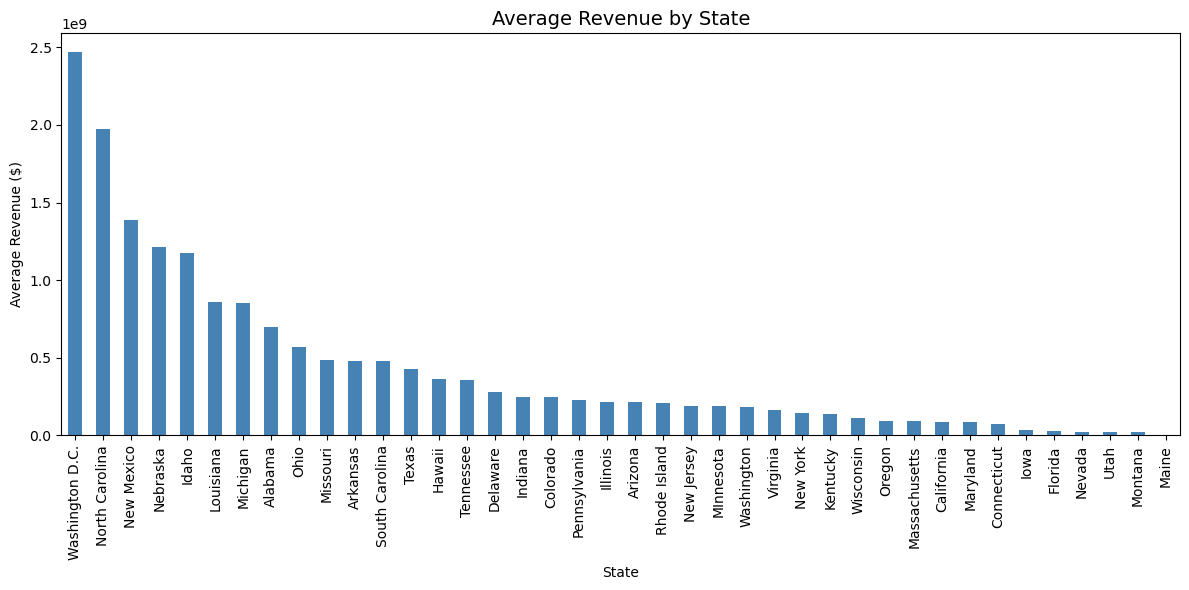

In [8]:
# Visualization 1
# Average revenue by state (high to low)
avg_revenue_state = df.groupby("Business State")["Total Revenue"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_revenue_state.plot(kind="bar", color="steelblue")
plt.title("Average Revenue by State", fontsize=14)
plt.ylabel("Average Revenue ($)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Visualization 1: Average Revenue by State  
A bar chart was created to display the average profit margin of businesses across different states. The dataset was grouped by state, and the mean profit margin for each was calculated. Due to a significant negative outlier in one state (Virginia), the results were adjusted to a range of -5 to +5 to enhance readability for the other states. This visualization helps identify which states have businesses that are more profitable, allowing fund managers to see where value creation is strongest.

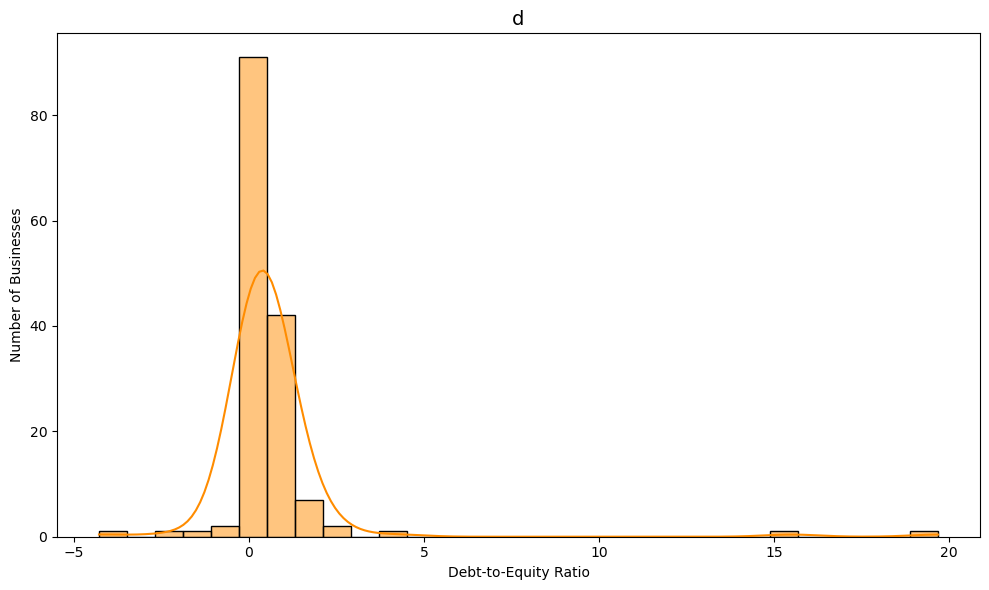

In [9]:
# Visualization 2
# Distribution of Debt-to-Equity Ratios
plt.figure(figsize=(10,6))
sns.histplot(df["Debt to Equity"], bins=30, kde=True, color="darkorange")
plt.title("d", fontsize=14)
plt.xlabel("Debt-to-Equity Ratio")
plt.ylabel("Number of Businesses")
plt.tight_layout()
plt.show()


#### Visualization 2: Distribution of Debt-to-Equity Ratios
A histogram with a kernel density estimate (KDE) was created to illustrate the distribution of debt-to-equity ratios across various businesses. The histplot function from Seaborn was utilized, with the number of bins set to 30 for a balance between detail and readability. This visualization offers insights into the overall leverage profile of the portfolio, indicating that most businesses have moderate leverage, while a small number of outliers present significantly higher financial risk.

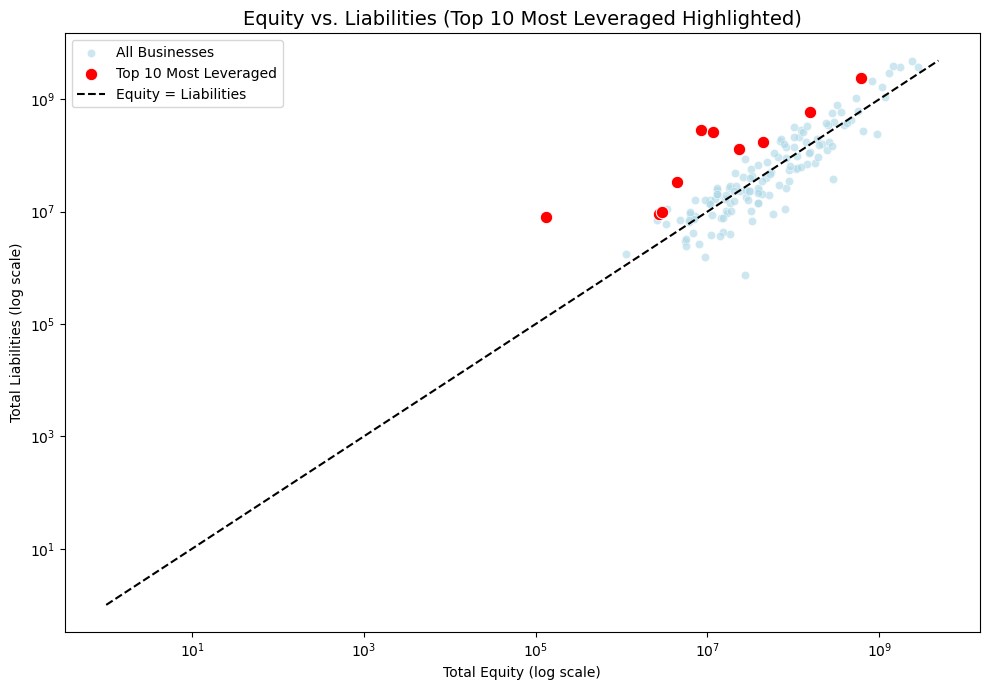

Top 10 Most Leveraged Businesses (by Liabilities-to-Equity Ratio):
 Business ID  Liabilities_to_Equity
  9440752013                  59.90
  8527722013                  34.08
  8267732013                  22.61
 11233162013                   7.70
 10930822013                   5.47
 10435092013                   3.97
 10192722013                   3.82
 10162812013                   3.79
   968852013                   3.42
  9241682013                   3.38


In [10]:
# Visualization 3
# Equity vs. Liabilities (Top 10 Most Leveraged Highlighted)

# Create Liabilities-to-Equity ratio
df["Liabilities_to_Equity"] = df["Total Liabilities"] / df["Total Equity"]

# Get top 10 most leveraged businesses
top10 = df.nlargest(10, "Liabilities_to_Equity")

# --- Scatterplot ---
plt.figure(figsize=(10,7))
sns.scatterplot(x="Total Equity", y="Total Liabilities", 
                data=df, alpha=0.6, color="lightblue", label="All Businesses")

# Highlight top 10
sns.scatterplot(x="Total Equity", y="Total Liabilities", 
                data=top10, color="red", s=80, label="Top 10 Most Leveraged")

# Add reference line (Equity = Liabilities)
max_val = max(df["Total Equity"].max(), df["Total Liabilities"].max())
plt.plot([1, max_val], [1, max_val], 'k--', label="Equity = Liabilities")

# Log scale for clarity
plt.xscale("log")
plt.yscale("log")

plt.title("Equity vs. Liabilities (Top 10 Most Leveraged Highlighted)", fontsize=14)
plt.xlabel("Total Equity (log scale)")
plt.ylabel("Total Liabilities (log scale)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Companion Table of Top 10 ---
top10_table = top10[["Business ID", "Liabilities_to_Equity"]].copy()
top10_table["Liabilities_to_Equity"] = top10_table["Liabilities_to_Equity"].round(2)

print("Top 10 Most Leveraged Businesses (by Liabilities-to-Equity Ratio):")
print(top10_table.to_string(index=False))

#### Visualization 3: Equity vs. Liabilities with Top 10 Most Leveraged Highlighted
A scatterplot was created to compare Total Equity against Total Liabilities for each business. A reference line indicating where equity equals liabilities was added to highlight the balance point. To emphasize riskier firms, the top 10 companies with the highest liabilities-to-equity ratios were highlighted in red, while the others remained in light blue. Both axes were scaled logarithmically to improve visibility for both small and large firms. This visualization helps identify the specific businesses that pose the greatest financial risk in the portfolio.

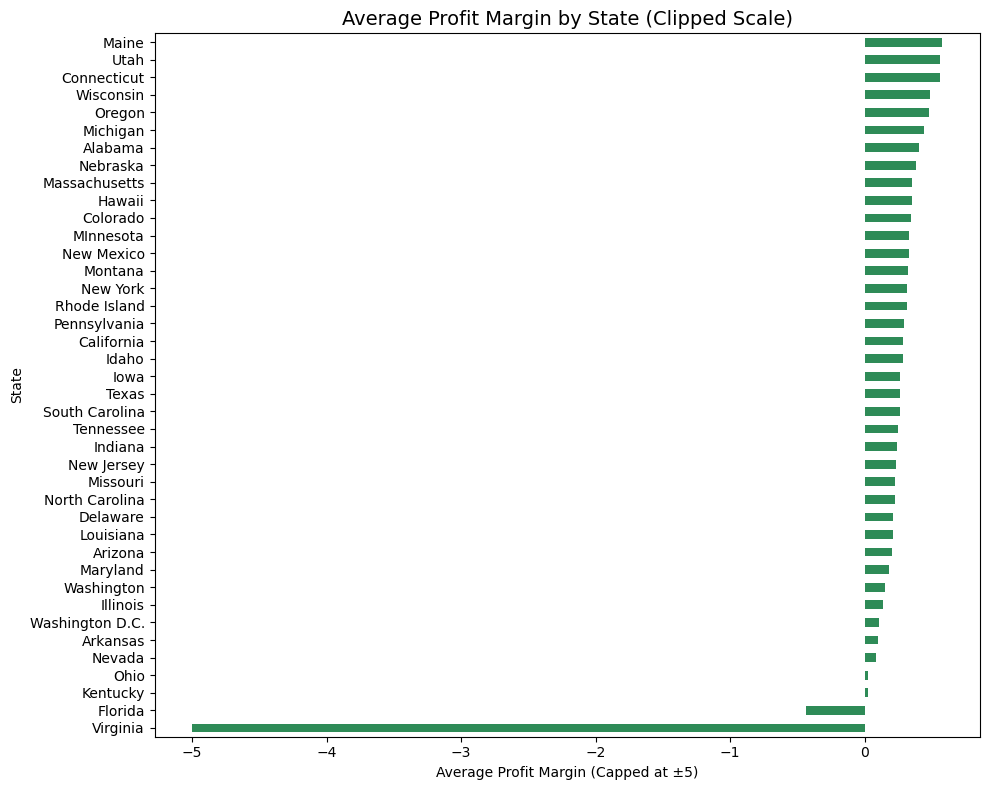

In [13]:
# Visualization 4
# Clip profit margins to -5 to +5 for readability
# Recalculate average profit margin by state
avg_profit_margin = df.groupby("Business State")["Profit Margin"].mean().sort_values()

# Clip profit margins to -5 to +5 for readability
avg_profit_margin_clipped = avg_profit_margin.clip(lower=-5, upper=5)

# Plot horizontal bar chart
plt.figure(figsize=(10,8))
avg_profit_margin_clipped.plot(kind="barh", color="seagreen")
plt.title("Average Profit Margin by State (Clipped Scale)", fontsize=14)
plt.xlabel("Average Profit Margin (Capped at ±5)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#### Visualization 4: Average Profit Margin by State  
A bar chart was created to display the average profit margin of businesses across different states. The dataset was grouped by state, and the mean profit margin for each was calculated. Due to a significant negative outlier in one state (Virginia), the results were adjusted to a range of -5 to +5 to enhance readability for the other states. This visualization helps identify which states have businesses that are more profitable, allowing fund managers to see where value creation is strongest.